In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import colors
from copy import deepcopy

%matplotlib inline

# Simulations #1

## Read CSVs

In [15]:
rashomon_csv = "../Results/worst_case/worst_case_rashomon.csv"
rashomon_raw_df = pd.read_csv(rashomon_csv)
rashomon_raw_df = rashomon_raw_df.drop("Unnamed: 0", axis=1)
rashomon_raw_df.head()

,n_per_pol,sim_num,num_pools,MSE,IOU,min_dosage,best_pol_diff
0,10,0,4,1.273589,0.666667,True,0.431312
1,10,0,6,1.273541,0.666667,True,0.431312
2,10,0,6,1.246443,0.666667,True,0.431312
3,10,0,6,1.163541,0.500000,True,-0.031748
4,10,0,6,0.882880,1.000000,True,-0.124469


In [16]:
lasso_csv = "../Results/worst_case/worst_case_lasso.csv"
lasso_raw_df = pd.read_csv(lasso_csv)
lasso_raw_df = lasso_raw_df.drop("Unnamed: 0", axis=1)
lasso_raw_df.head()

,n_per_pol,sim_num,MSE,L1_loss,IOU,min_dosage,best_pol_diff
0,10,0,1.292713,1.815938,0.000000,False,0.767750
1,10,1,1.334753,1.867528,0.000000,False,0.672252
2,10,2,1.307035,1.820367,0.666667,True,0.866680
3,10,3,1.230203,1.778602,0.333333,False,0.516012
4,10,4,1.428380,1.978924,0.000000,False,0.494559


In [17]:
tva_csv = "../Results/worst_case/worst_case_tva.csv"
tva_raw_df = pd.read_csv(tva_csv)
tva_raw_df = tva_raw_df.drop("Unnamed: 0", axis=1)
tva_raw_df.head()

,n_per_pol,sim_num,MSE,TVA_loss,IOU,min_dosage,best_pol_diff
0,10,0,0.179686,0.179686,0.125,True,6.0
1,10,1,0.155418,0.155418,0.125,True,6.0
2,10,2,0.168752,0.168752,0.125,True,6.0
3,10,3,0.188533,0.188533,0.125,True,6.0
4,10,4,0.191201,0.191201,0.125,True,6.0


In [18]:
# ct_csv = "../Results/worst_case_causal_trees.csv"
# ct_raw_df = pd.read_csv(ct_csv)
# ct_raw_df = ct_raw_df.drop("Unnamed: 0", axis=1)
# ct_raw_df.head()

## Summarize rashomon sets results

In [19]:
rashomon_df = rashomon_raw_df.copy()

rashomon_df["best_pol_MSE"] = rashomon_df["best_pol_diff"]**2

group_by_cols = ["n_per_pol", "sim_num"]
result_cols = ["num_pools", "MSE", "IOU", "min_dosage", "best_pol_MSE"]
for result_col in result_cols:
    result_min_col = result_col + "_min"
    result_avg_col = result_col + "_mean"
    result_max_col = result_col + "_max"
    result_var_col = result_col + "_var"
    
    rashomon_df[result_min_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("min")
    rashomon_df[result_avg_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("mean")
    rashomon_df[result_max_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("max")
    rashomon_df[result_var_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("var")

rashomon_df = rashomon_df.drop_duplicates(group_by_cols)
rashomon_df = rashomon_df.drop(result_cols, axis=1)
rashomon_df = rashomon_df.drop(["best_pol_diff"], axis=1)
rashomon_df.head(n=10)

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,4,6.750000,9,3.071429,0.853268,1.056888,1.273589,0.039268,...,1.0,0.047619,False,0.875000,True,0.125000,0.001008,0.081593,0.186030,0.007644
8,10,1,4,6.750000,9,3.071429,0.960854,1.183972,1.401185,0.040321,...,1.0,0.047619,True,1.000000,True,0.000000,0.000742,0.084004,0.217687,0.012265
16,10,2,4,6.750000,9,3.071429,0.989166,1.109033,1.250069,0.015855,...,1.0,0.047619,True,1.000000,True,0.000000,0.034470,0.116737,0.221294,0.006092
24,10,3,4,6.400000,9,3.155556,0.862248,1.125416,1.598045,0.060280,...,1.0,0.058333,False,0.700000,True,0.233333,0.006977,0.193568,0.629136,0.058989
34,10,4,4,7.000000,9,4.000000,0.935391,1.116663,1.560873,0.075760,...,1.0,0.062963,False,0.833333,True,0.166667,0.000047,0.042256,0.188621,0.005312
40,10,5,4,6.750000,9,3.071429,0.878158,1.081788,1.304648,0.037206,...,1.0,0.047619,True,1.000000,True,0.000000,0.003015,0.083428,0.202727,0.009843
48,10,6,4,7.200000,9,4.700000,1.003379,1.115681,1.535600,0.055164,...,1.0,0.055556,False,0.800000,True,0.200000,0.003233,0.132690,0.448100,0.031942
53,10,7,4,7.000000,9,4.000000,0.998476,1.157841,1.548641,0.054246,...,1.0,0.062963,True,1.000000,True,0.000000,0.146186,0.320622,0.626208,0.057154
59,10,8,4,6.181818,9,3.363636,0.922582,1.204722,1.598767,0.058686,...,1.0,0.101515,False,0.545455,True,0.272727,0.065877,0.197734,0.896643,0.059235
70,10,9,4,7.200000,9,4.700000,1.053834,1.157600,1.544172,0.046718,...,1.0,0.055556,True,1.000000,True,0.000000,0.002396,0.083853,0.385483,0.028444


## Average over simulations

In [20]:
sum_cols = [
    "num_pools_min", "num_pools_mean", "num_pools_max", "num_pools_var",
    "MSE_min", "MSE_mean", "MSE_max", "MSE_var",
    "IOU_min", "IOU_mean", "IOU_max", "IOU_var",
    "min_dosage_min", "min_dosage_mean", "min_dosage_max", "min_dosage_var",
    "best_pol_MSE_min", "best_pol_MSE_mean", "best_pol_MSE_max", "best_pol_MSE_var"
]

for sum_col in sum_cols:
    rashomon_df[sum_col] = rashomon_df.groupby("n_per_pol")[sum_col].transform("mean")

rashomon_df = rashomon_df.drop_duplicates("n_per_pol")
rashomon_df.head()

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,4.04,6.581056,8.90,3.363348,0.932575,1.151965,1.464645,0.047836,...,1.0,0.051250,0.29,0.862111,1.0,0.124651,0.017394,0.191437,0.657861,0.072907
889,20,0,4.04,6.678679,8.95,3.423763,0.964905,1.152956,1.439204,0.041822,...,1.0,0.051429,0.35,0.893407,1.0,0.101383,0.013470,0.144821,0.541016,0.053835
1697,50,0,4.00,6.716190,9.00,3.379527,0.975884,1.153353,1.419583,0.039303,...,1.0,0.049432,0.58,0.944238,1.0,0.055430,0.006528,0.119956,0.453789,0.038860
2493,100,0,4.00,6.774278,9.00,3.382310,0.993162,1.158659,1.404650,0.036897,...,1.0,0.051047,0.48,0.928694,1.0,0.071083,0.001998,0.099917,0.356310,0.027798
3254,500,0,4.00,6.774444,9.00,3.178135,0.997325,1.165860,1.374119,0.035486,...,1.0,0.049255,0.50,0.934722,1.0,0.065278,0.000538,0.089675,0.256091,0.016741


In [21]:
lasso_df = lasso_raw_df.copy()

lasso_df["best_pol_MSE"] = lasso_df["best_pol_diff"]**2
sum_cols_lasso = ["MSE", "L1_loss", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_lasso:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"
    
    lasso_df[result_min_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("min")
    lasso_df[result_avg_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("mean")
    lasso_df[result_max_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("max")
    lasso_df[result_var_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("var")

lasso_df = lasso_df.drop_duplicates("n_per_pol")
lasso_df = lasso_df.drop(sum_cols_lasso, axis=1)
lasso_df = lasso_df.drop(["best_pol_diff"], axis=1)
lasso_df.head(n=10)

,n_per_pol,sim_num,MSE_min,MSE_mean,MSE_max,MSE_var,L1_loss_min,L1_loss_mean,L1_loss_max,L1_loss_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,1.093936,1.316280,1.777184,0.015542,1.612284,1.842031,2.305475,0.016338,...,0.666667,0.023917,False,0.05,True,0.04798,0.085973,0.582030,1.533636,0.070763
100,20,0,1.139198,1.330753,1.627800,0.008578,1.649650,1.853116,2.139001,0.008596,...,0.000000,0.000000,False,0.00,False,0.00000,0.097539,0.621881,1.121576,0.044920
200,50,0,1.163585,1.336253,1.467622,0.003293,1.692366,1.857349,1.992950,0.003365,...,0.000000,0.000000,False,0.00,False,0.00000,0.336773,0.631080,1.090002,0.022112
300,100,0,1.238399,1.353244,1.441999,0.001846,1.765310,1.874322,1.969365,0.001888,...,0.000000,0.000000,False,0.00,False,0.00000,0.422957,0.627291,0.965299,0.011462
400,500,0,1.310865,1.356444,1.413665,0.000421,1.832359,1.877403,1.936230,0.000445,...,0.000000,0.000000,False,0.00,False,0.00000,0.521867,0.625523,0.736907,0.001955
500,1000,0,1.326580,1.359779,1.387559,0.000194,1.845721,1.880621,1.909590,0.000198,...,0.000000,0.000000,False,0.00,False,0.00000,0.550703,0.627011,0.703643,0.001066


In [22]:
tva_df = tva_raw_df.copy()

tva_df["best_pol_MSE"] = tva_df["best_pol_diff"]**2
sum_cols_tva = ["MSE", "TVA_loss", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_tva:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"

    tva_df[result_min_col] = tva_df.groupby("n_per_pol")[sum_col].transform("min")
    tva_df[result_avg_col] = tva_df.groupby("n_per_pol")[sum_col].transform("mean")
    tva_df[result_max_col] = tva_df.groupby("n_per_pol")[sum_col].transform("max")
    tva_df[result_var_col] = tva_df.groupby("n_per_pol")[sum_col].transform("var")

tva_df = tva_df.drop_duplicates("n_per_pol")
tva_df = tva_df.drop(sum_cols_tva, axis=1)
tva_df = tva_df.drop(["best_pol_diff"], axis=1)
tva_df.head(n=10)

,n_per_pol,sim_num,MSE_min,MSE_mean,MSE_max,MSE_var,TVA_loss_min,TVA_loss_mean,TVA_loss_max,TVA_loss_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,0.117902,0.184901,0.325214,1.311347e-03,0.117902,0.184901,0.325214,1.311347e-03,...,0.125,0.0,True,1.0,True,0.0,36.0,36.0,36.0,0.0
100,20,0,0.061605,0.084614,0.110316,1.111633e-04,0.061605,0.084614,0.110316,1.111633e-04,...,0.125,0.0,True,1.0,True,0.0,36.0,36.0,36.0,0.0
200,50,0,0.025598,0.032166,0.039240,7.486849e-06,0.025598,0.032166,0.039240,7.486849e-06,...,0.125,0.0,True,1.0,True,0.0,36.0,36.0,36.0,0.0
300,100,0,0.013601,0.015690,0.017786,7.638014e-07,0.013601,0.015690,0.017786,7.638014e-07,...,0.125,0.0,True,1.0,True,0.0,36.0,36.0,36.0,0.0
400,500,0,0.002860,0.003094,0.003269,5.789663e-09,0.002860,0.003094,0.003269,5.789663e-09,...,0.125,0.0,True,1.0,True,0.0,36.0,36.0,36.0,0.0
500,1000,0,0.001494,0.001551,0.001623,7.853094e-10,0.001494,0.001551,0.001623,7.853094e-10,...,0.125,0.0,True,1.0,True,0.0,36.0,36.0,36.0,0.0


In [23]:
# ct_df = ct_raw_df.copy()

# ct_df["best_pol_MSE"] = ct_df["best_pol_diff"]**2
# sum_cols_ct = ["MSE", "IOU", "min_dosage", "best_pol_MSE"]

# for sum_col in sum_cols_ct:
#     result_min_col = sum_col + "_min"
#     result_avg_col = sum_col + "_mean"
#     result_max_col = sum_col + "_max"
#     result_var_col = sum_col + "_var"
    
#     ct_df[result_min_col] = ct_df.groupby("n_per_pol")[sum_col].transform("min")
#     ct_df[result_avg_col] = ct_df.groupby("n_per_pol")[sum_col].transform("mean")
#     ct_df[result_max_col] = ct_df.groupby("n_per_pol")[sum_col].transform("max")
#     ct_df[result_var_col] = ct_df.groupby("n_per_pol")[sum_col].transform("var")

# ct_df = ct_df.drop_duplicates("n_per_pol")
# ct_df = ct_df.drop(sum_cols_ct, axis=1)
# ct_df = ct_df.drop(["best_pol_diff"], axis=1)
# ct_df.head(n=10)

## Plots

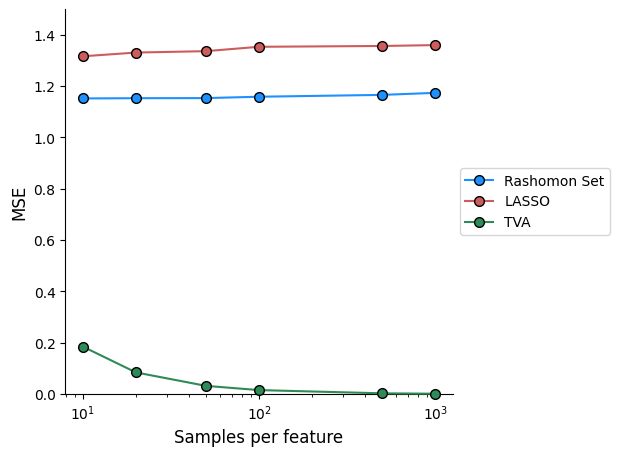

In [24]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["MSE_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["MSE_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

# ax.plot(ct_df["n_per_pol"], ct_df["MSE_mean"],
#         color="seagreen", zorder=3.5, clip_on=False,
#         marker="o", markeredgecolor="black", markersize=7,
#         label="Causal Tree")

ax.plot(tva_df["n_per_pol"], tva_df["MSE_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="TVA")

ax.set_xscale("log")
ax.set_xlabel("Samples per feature", fontsize=12)
ax.set_ylim(0, 1.5)
ax.set_ylabel("MSE", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("../Figures/worst_case/MSE.png", dpi=300, bbox_inches="tight")
plt.show()

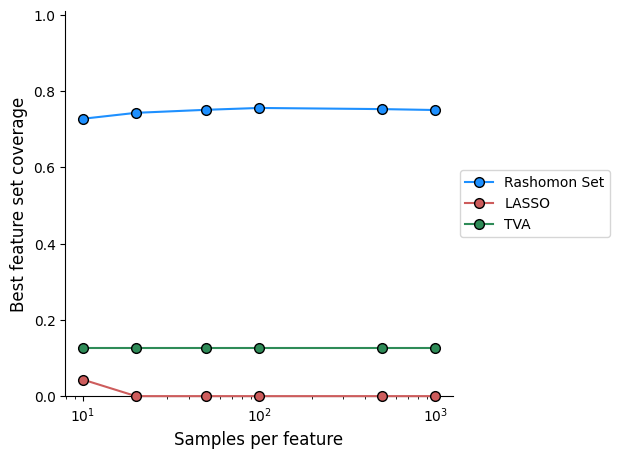

In [25]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["IOU_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["IOU_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

# ax.plot(ct_df["n_per_pol"], ct_df["IOU_mean"],
#         color="seagreen", zorder=3.5, clip_on=False,
#         marker="o", markeredgecolor="black", markersize=7,
#         label="Causal Tree")

ax.plot(tva_df["n_per_pol"], tva_df["IOU_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="TVA")

ax.set_xscale("log")
ax.set_xlabel("Samples per feature", fontsize=12)
ax.set_ylim(0, 1.01)
ax.set_ylabel("Best feature set coverage", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("../Figures/worst_case/feature_coverage.png", dpi=300, bbox_inches="tight")
plt.show()

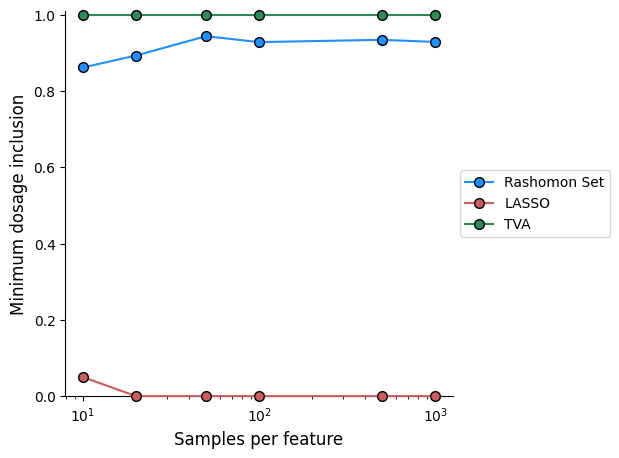

In [26]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["min_dosage_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["min_dosage_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

# ax.plot(ct_df["n_per_pol"], ct_df["min_dosage_mean"],
#         color="seagreen", zorder=3.5, clip_on=False,
#         marker="o", markeredgecolor="black", markersize=7,
#         label="Causal Tree")

ax.plot(tva_df["n_per_pol"], tva_df["min_dosage_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="TVA")

ax.set_xscale("log")
ax.set_xlabel("Samples per feature", fontsize=12)
ax.set_ylim(0, 1.01)
ax.set_ylabel("Minimum dosage inclusion", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("../Figures/worst_case/min_dosage_inclusion_ct.png", dpi=300, bbox_inches="tight")
plt.show()

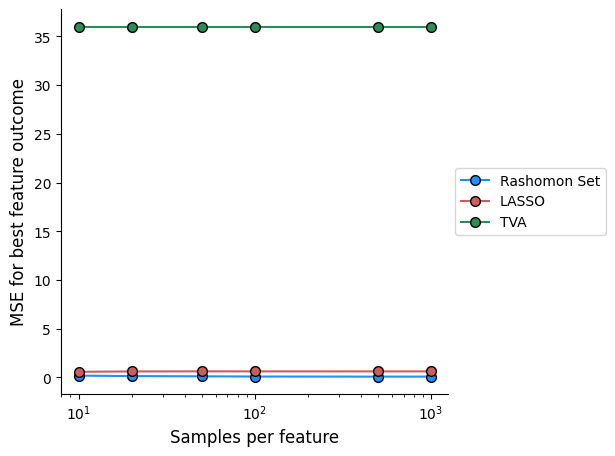

In [27]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["best_pol_MSE_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["best_pol_MSE_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

# ax.plot(ct_df["n_per_pol"], ct_df["best_pol_MSE_mean"],
#         color="seagreen", zorder=3.5, clip_on=False,
#         marker="o", markeredgecolor="black", markersize=7,
#         label="Causal Tree")

ax.plot(tva_df["n_per_pol"], tva_df["best_pol_MSE_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="TVA")

ax.set_xscale("log")
ax.set_xlabel("Samples per feature", fontsize=12)
# ax.set_ylim(0, 1)
ax.set_ylabel("MSE for best feature outcome", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("../Figures/worst_case/best_feature_MSE.png", dpi=300, bbox_inches="tight")
plt.show()

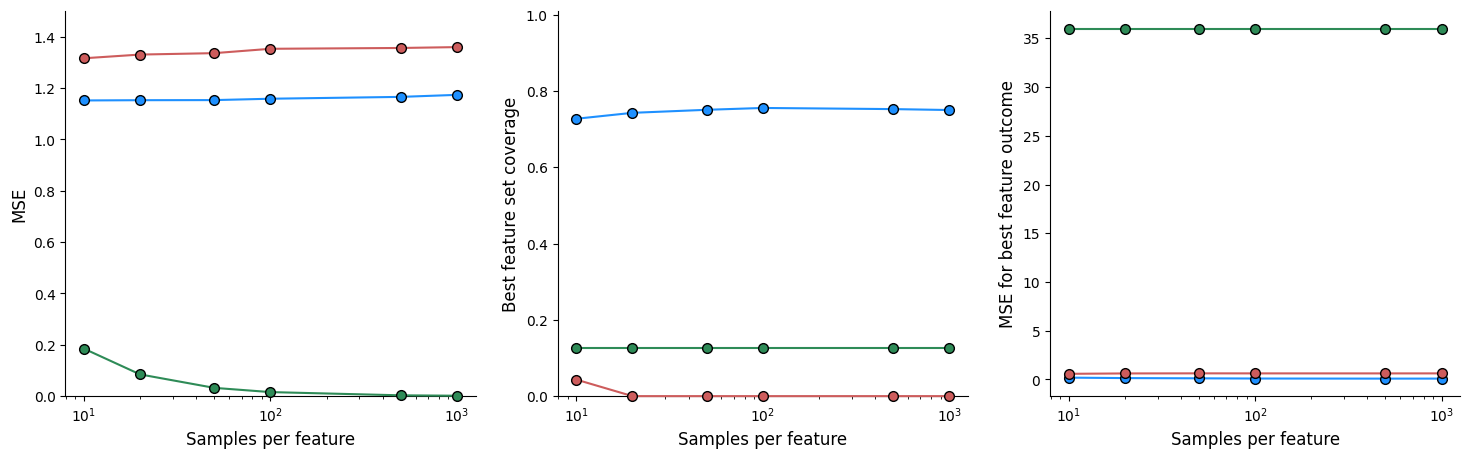

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i in range(3):
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].set_xscale("log")
    ax[i].set_xlabel("Samples per feature", fontsize=12)


ax[0].plot(rashomon_df["n_per_pol"], rashomon_df["MSE_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")
ax[0].plot(lasso_df["n_per_pol"], lasso_df["MSE_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")
ax[0].plot(tva_df["n_per_pol"], tva_df["MSE_mean"],
        color="seagreen", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="TVA")

ax[0].set_ylim(0, 1.5)
ax[0].set_ylabel("MSE", fontsize=12)

ax[1].plot(rashomon_df["n_per_pol"], rashomon_df["IOU_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax[1].plot(lasso_df["n_per_pol"], lasso_df["IOU_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax[1].plot(tva_df["n_per_pol"], tva_df["IOU_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="TVA")

ax[1].set_ylim(0, 1.01)
ax[1].set_ylabel("Best feature set coverage", fontsize=12)


ax[2].plot(rashomon_df["n_per_pol"], rashomon_df["best_pol_MSE_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax[2].plot(lasso_df["n_per_pol"], lasso_df["best_pol_MSE_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax[2].plot(tva_df["n_per_pol"], tva_df["best_pol_MSE_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="TVA")

ax[2].set_ylabel("MSE for best feature outcome", fontsize=12)


# ax[2].legend(loc="center left", bbox_to_anchor=(0.5, 0.5))

plt.savefig("../Figures/worst_case/mse_coverage_best_eff.png", dpi=300, bbox_inches="tight")

plt.show()

# Simulations #2

In [54]:
n = 3
n_str = str(n)

In [55]:
rashomon_csv = "../Results/simulation_" + n_str + "_rashomon.csv"
# rashomon_csv = "../Results/reff_simulations_rashomon_10_10.csv"
rashomon_raw_df = pd.read_csv(rashomon_csv)
rashomon_raw_df = rashomon_raw_df.drop("Unnamed: 0", axis=1)
rashomon_raw_df.head()

,n_per_pol,sim_num,num_pools,MSE,IOU,min_dosage,best_pol_diff,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
0,10,0,9,1.211022,1.0,True,-0.490068,0,0,1,0,0,0,0,0
1,10,0,10,1.202085,1.0,True,-0.490068,0,0,1,0,0,0,0,0
2,10,0,10,1.207921,1.0,True,-0.490068,0,0,1,0,0,0,0,0
3,10,0,10,1.208307,1.0,True,-0.490068,0,0,1,0,0,0,0,0
4,10,0,10,1.209578,1.0,True,-0.490068,0,0,1,0,0,0,0,0


In [4]:
lasso_csv = "../Results/simulation_" + n_str + "_lasso.csv"
lasso_raw_df = pd.read_csv(lasso_csv)
lasso_raw_df = lasso_raw_df.drop("Unnamed: 0", axis=1)
lasso_raw_df.head()

,n_per_pol,sim_num,MSE,L1_loss,IOU,min_dosage,best_pol_diff,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
0,10,0,1.926917,2.799963,0.0,False,0.637768,0,0,0,0,0,0,0,1
1,10,1,1.938678,2.797062,0.0,False,0.397680,0,0,0,0,0,0,0,1
2,10,2,1.938678,2.797062,0.0,False,0.397680,0,0,0,0,0,0,0,1
3,10,3,1.938678,2.797062,0.0,False,0.397680,0,0,0,0,0,0,0,1
4,10,4,1.938678,2.797062,0.0,False,0.397680,0,0,0,0,0,0,0,1


In [5]:
ct_csv = "../Results/simulation_" + n_str + "_causal_trees.csv"
ct_raw_df = pd.read_csv(ct_csv)
ct_raw_df = ct_raw_df.drop("Unnamed: 0", axis=1)
ct_raw_df.head()

,n_per_pol,sim_num,MSE,IOU,min_dosage,best_pol_diff,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
0,10,0,1.052201,0.0,False,-0.390068,1,0,1,0,0,0,0,0
1,10,1,1.088813,0.0,False,-0.195540,1,0,1,0,0,0,0,0
2,10,2,1.088813,0.0,False,-0.195540,1,0,1,0,0,0,0,0
3,10,3,1.088813,0.0,False,-0.195540,1,0,1,0,0,0,0,0
4,10,4,1.088813,0.0,False,-0.195540,1,0,1,0,0,0,0,0


### Summarize Rashomon results

In [47]:
rashomon_df = rashomon_raw_df.copy()

reg = 1e-1
rashomon_df["best_pol_MSE"] = rashomon_df["best_pol_diff"]**2
rashomon_df["loss"] = rashomon_df["MSE"] + reg * rashomon_df["num_pools"]

group_by_cols = ["n_per_pol", "sim_num"]
result_cols = ["num_pools", "MSE", "IOU", "min_dosage", "best_pol_MSE"]
for result_col in result_cols:
    result_min_col = result_col + "_min"
    result_avg_col = result_col + "_mean"
    result_max_col = result_col + "_max"
    result_var_col = result_col + "_var"
    
    rashomon_df[result_min_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("min")
    rashomon_df[result_avg_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("mean")
    rashomon_df[result_max_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("max")
    rashomon_df[result_var_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("var")


# Find the frequency of best profiles in Rashomon set
# Also find the best profile in the best model in every set
profiles = []
profile_cols = ["(0, 0, 0)", "(0, 0, 1)", "(0, 1, 0)", "(0, 1, 1)",
                "(1, 0, 0)", "(1, 0, 1)", "(1, 1, 0)", "(1, 1, 1)"]
x = rashomon_df.groupby(group_by_cols)["loss"].idxmin()
for profile in profile_cols:
    profile_mean_col = profile + "_mean"
    profile_best_col = profile + "_best"
    rashomon_df[profile_mean_col] = rashomon_df.groupby(group_by_cols)[profile].transform("mean")
    rashomon_df[profile_best_col] = rashomon_df[profile].loc[x]
    

rashomon_df = rashomon_df.drop_duplicates(group_by_cols)
rashomon_df = rashomon_df.drop(result_cols, axis=1)
rashomon_df = rashomon_df.drop(profile_cols, axis=1)
rashomon_df = rashomon_df.drop(["best_pol_diff", "loss"], axis=1)
rashomon_df.head(n=10)

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,"(0, 1, 1)_mean","(0, 1, 1)_best","(1, 0, 0)_mean","(1, 0, 0)_best","(1, 0, 1)_mean","(1, 0, 1)_best","(1, 1, 0)_mean","(1, 1, 0)_best","(1, 1, 1)_mean","(1, 1, 1)_best"
0,10,0,8,11.744539,12,0.26902,3.362729,3.500267,3.544320,0.001862,...,0.004297,0.0,0.0,0.0,0.631968,0.0,0.002387,0.0,0.010744,0.0
8377,10,1,8,11.744539,12,0.26902,3.346992,3.398956,3.411896,0.000123,...,0.020891,0.0,0.0,0.0,0.944849,1.0,0.025188,0.0,0.009072,0.0
16754,10,2,8,11.744539,12,0.26902,3.114504,3.215118,3.244069,0.000776,...,0.006685,0.0,0.0,0.0,0.214755,0.0,0.419243,1.0,0.048108,0.0
25131,10,3,8,11.744539,12,0.26902,3.330584,3.381036,3.398583,0.000113,...,0.053122,0.0,0.0,0.0,0.599379,1.0,0.160439,0.0,0.187060,0.0
33508,10,4,8,11.744539,12,0.26902,3.122370,3.192101,3.201062,0.000049,...,0.000000,0.0,0.0,0.0,0.656440,1.0,0.341650,0.0,0.001910,0.0
41885,10,5,8,11.744539,12,0.26902,3.684425,3.717710,3.724250,0.000031,...,0.994986,1.0,0.0,0.0,0.000000,0.0,0.005014,0.0,0.000000,0.0
50262,10,6,8,11.744539,12,0.26902,3.420002,3.462627,3.485032,0.000143,...,0.018145,0.0,0.0,0.0,0.428554,1.0,0.230990,0.0,0.072102,0.0
58639,10,7,8,11.744539,12,0.26902,3.133049,3.173510,3.188128,0.000111,...,0.335442,0.0,0.0,0.0,0.052764,0.0,0.045243,0.0,0.541483,1.0
67016,10,8,8,11.744539,12,0.26902,3.217594,3.279615,3.298202,0.000192,...,0.840754,1.0,0.0,0.0,0.014683,0.0,0.110541,0.0,0.008953,0.0
75393,10,9,8,11.744539,12,0.26902,3.255333,3.318052,3.336958,0.000246,...,0.009072,0.0,0.0,0.0,0.413155,1.0,0.247941,0.0,0.054912,0.0


### Average over simulations

In [5]:
sum_cols = [
    "num_pools_min", "num_pools_mean", "num_pools_max", "num_pools_var",
    "MSE_min", "MSE_mean", "MSE_max", "MSE_var",
    "IOU_min", "IOU_mean", "IOU_max", "IOU_var",
    "min_dosage_min", "min_dosage_mean", "min_dosage_max", "min_dosage_var",
    "best_pol_MSE_min", "best_pol_MSE_mean", "best_pol_MSE_max", "best_pol_MSE_var",
]
sum_cols += [profile + "_best" for profile in profile_cols]
sum_cols += [profile + "_mean" for profile in profile_cols]

for sum_col in sum_cols:
    rashomon_df[sum_col] = rashomon_df.groupby("n_per_pol")[sum_col].transform("mean")

rashomon_df = rashomon_df.drop_duplicates("n_per_pol")
rashomon_df.head()

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,"(0, 1, 1)_mean","(0, 1, 1)_best","(1, 0, 0)_mean","(1, 0, 0)_best","(1, 0, 1)_mean","(1, 0, 1)_best","(1, 1, 0)_mean","(1, 1, 0)_best","(1, 1, 1)_mean","(1, 1, 1)_best"
0,10,0,8.0,11.317683,11.777778,0.306233,6.532458,6.656089,6.694797,0.001007,...,0.168826,0.111111,0.0,0.0,0.313137,0.444444,0.217599,0.111111,0.145871,0.222222


In [8]:
lasso_df = lasso_raw_df.copy()

lasso_df["best_pol_MSE"] = lasso_df["best_pol_diff"]**2
sum_cols_lasso = ["MSE", "L1_loss", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_lasso:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"
    
    lasso_df[result_min_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("min")
    lasso_df[result_avg_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("mean")
    lasso_df[result_max_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("max")
    lasso_df[result_var_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("var")


for profile in profile_cols:
    profile_mean_col = profile + "_mean"
    lasso_df[profile_mean_col] = lasso_df.groupby("n_per_pol")[profile].transform("mean")

lasso_df = lasso_df.drop_duplicates("n_per_pol")
lasso_df = lasso_df.drop(sum_cols_lasso, axis=1)
lasso_df = lasso_df.drop(["best_pol_diff"], axis=1)
lasso_df = lasso_df.drop(profile_cols, axis=1)
lasso_df.head(n=10)

,n_per_pol,sim_num,MSE_min,MSE_mean,MSE_max,MSE_var,L1_loss_min,L1_loss_mean,L1_loss_max,L1_loss_var,...,best_pol_MSE_max,best_pol_MSE_var,"(0, 0, 0)_mean","(0, 0, 1)_mean","(0, 1, 0)_mean","(0, 1, 1)_mean","(1, 0, 0)_mean","(1, 0, 1)_mean","(1, 1, 0)_mean","(1, 1, 1)_mean"
0,10,0,1.926917,1.938560,1.938678,0.000001,2.797062,2.797091,2.799963,8.415617e-08,...,0.406748,0.000618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100,100,0,1.917721,1.917721,1.917721,0.000000,2.776592,2.776592,2.776592,0.000000e+00,...,0.429285,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
200,500,0,1.920577,1.920577,1.920577,0.000000,2.771198,2.771198,2.771198,0.000000e+00,...,0.409958,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,1000,0,1.914311,1.914311,1.914311,0.000000,2.770546,2.770546,2.770546,0.000000e+00,...,0.421221,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
400,5000,0,1.911713,1.911713,1.911713,0.000000,2.764598,2.764598,2.764598,0.000000e+00,...,0.438067,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
ct_df = ct_raw_df.copy()

ct_df["best_pol_MSE"] = ct_df["best_pol_diff"]**2
sum_cols_ct = ["MSE", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_ct:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"
    
    ct_df[result_min_col] = ct_df.groupby("n_per_pol")[sum_col].transform("min")
    ct_df[result_avg_col] = ct_df.groupby("n_per_pol")[sum_col].transform("mean")
    ct_df[result_max_col] = ct_df.groupby("n_per_pol")[sum_col].transform("max")
    ct_df[result_var_col] = ct_df.groupby("n_per_pol")[sum_col].transform("var")


for profile in profile_cols:
    profile_mean_col = profile + "_mean"
    ct_df[profile_mean_col] = ct_df.groupby("n_per_pol")[profile].transform("mean")

ct_df = ct_df.drop_duplicates("n_per_pol")
ct_df = ct_df.drop(sum_cols_ct, axis=1)
ct_df = ct_df.drop(["best_pol_diff"], axis=1)
ct_df = ct_df.drop(profile_cols, axis=1)
ct_df.head(n=10)

,n_per_pol,sim_num,MSE_min,MSE_mean,MSE_max,MSE_var,IOU_min,IOU_mean,IOU_max,IOU_var,...,best_pol_MSE_max,best_pol_MSE_var,"(0, 0, 0)_mean","(0, 0, 1)_mean","(0, 1, 0)_mean","(0, 1, 1)_mean","(1, 0, 0)_mean","(1, 0, 1)_mean","(1, 1, 0)_mean","(1, 1, 1)_mean"
0,10,0,1.052201,1.088447,1.088813,0.000013,0.000000,0.000000,0.000000,0.0,...,1.521531e-01,0.00013,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
100,100,0,1.113799,1.113799,1.113799,0.000000,0.500000,0.500000,0.500000,0.0,...,1.262568e-03,0.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
200,500,0,1.120864,1.120864,1.120864,0.000000,0.666667,0.666667,0.666667,0.0,...,3.727007e-06,0.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
300,1000,0,1.114895,1.114895,1.114895,0.000000,0.666667,0.666667,0.666667,0.0,...,2.294134e-07,0.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
400,5000,0,1.118203,1.118203,1.118203,0.000000,0.666667,0.666667,0.666667,0.0,...,1.192473e-06,0.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Plots for best feature profile

In [6]:
profile_col_means = [col + "_mean" for col in profile_cols]
profile_col_best = [col + "_best" for col in profile_cols]
rashomon_best_profile_freqs = []
# lasso_best_profile_freqs = []
for n in [5, 10, 25, 50, 100, 250, 500]:
    rashomon_best_profile_freqs.append(rashomon_df[rashomon_df["n_per_pol"] == n][profile_col_best])
    # lasso_best_profile_freqs.append(lasso_df[lasso_df["n_per_pol"] == n][profile_col_means])

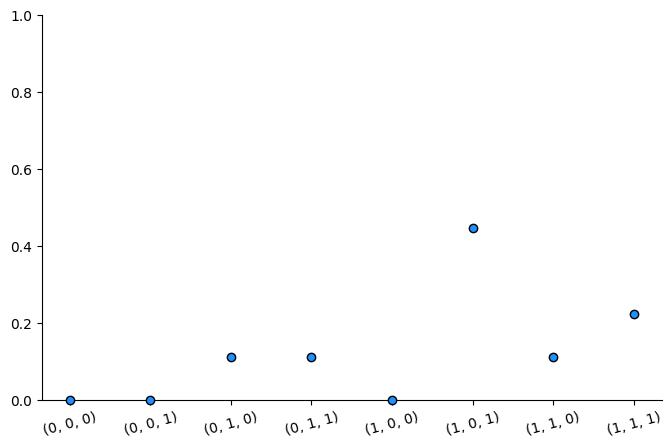

In [11]:
fig, ax = plt.subplots(figsize=(8,5))

ax.spines[['right', 'top']].set_visible(False)
ax.set_xticks(np.arange(len(profile_cols)), profile_cols, rotation=15)
ax.set_ylim(0, 1)


ax.scatter(np.arange(len(profile_cols)), rashomon_best_profile_freqs[1],
           color="dodgerblue", edgecolor="black", zorder=3, clip_on=False,
           # label="Rashomon Set"
          )

ValueError: x and y must be the same size

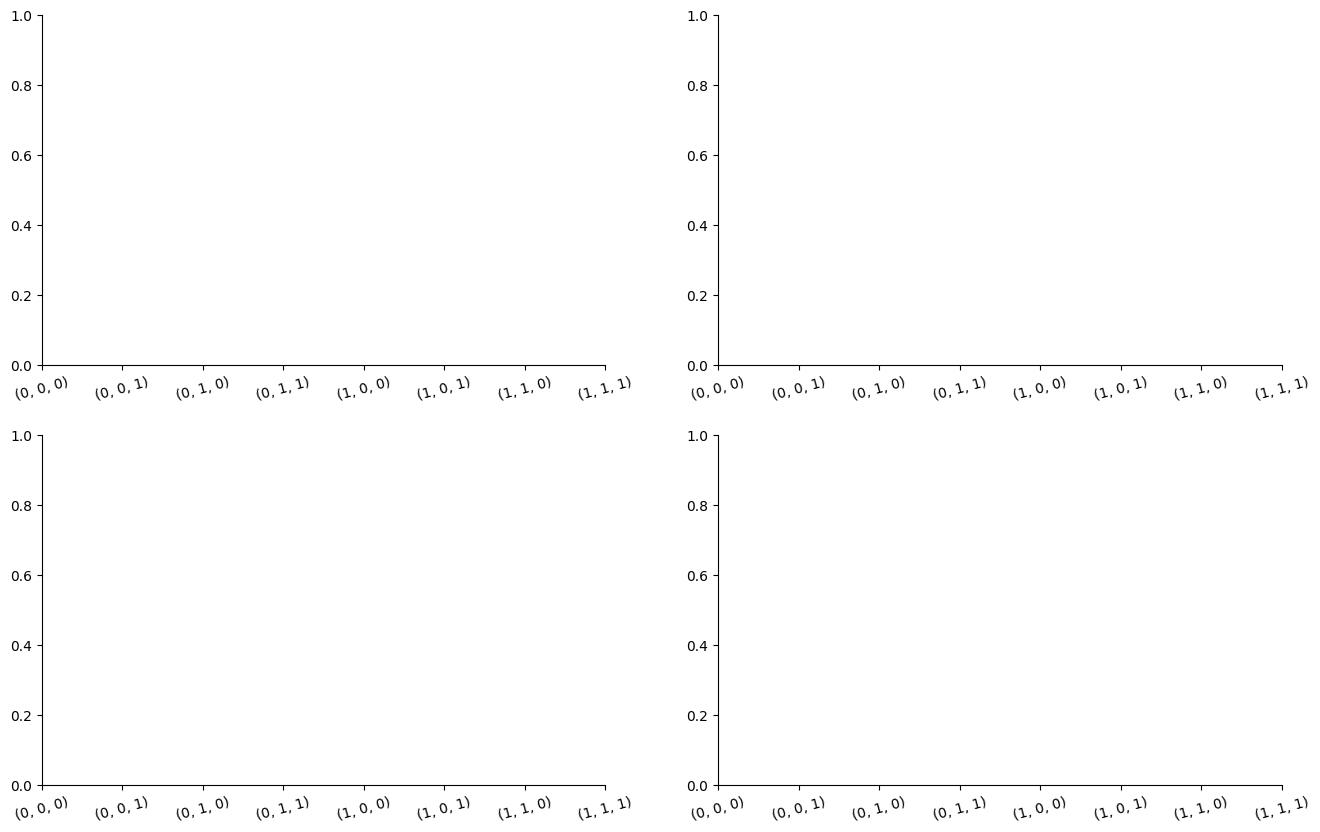

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16,10))

for i in range(2):
    for j in range(2):
        ax[i, j].spines[['right', 'top']].set_visible(False)
        ax[i, j].set_xticks(np.arange(len(profile_cols)), profile_cols, rotation=15)
        ax[i, j].set_ylim(0, 1)


ax[0, 0].scatter(np.arange(len(profile_cols)), rashomon_best_profile_freqs[0],
           color="dodgerblue", edgecolor="black", zorder=3, clip_on=False,
           # label="Rashomon Set"
          )
# ax[0, 0].scatter(np.arange(len(profile_cols)), lasso_best_profile_freqs[0],
#            color="indianred", edgecolor="black", zorder=3, clip_on=False,
#            # label="Lasso"
#           )
ax[0, 0].set_title("Samples per feature = 10")

ax[0, 1].scatter(np.arange(len(profile_cols)), rashomon_best_profile_freqs[1],
           color="dodgerblue", edgecolor="black", zorder=3, clip_on=False,
           # label="Rashomon Set"
          )
# ax[0, 1].scatter(np.arange(len(profile_cols)), lasso_best_profile_freqs[1],
#            color="indianred", edgecolor="black", zorder=3, clip_on=False,
#            # label="Lasso"
#           )
ax[0, 1].set_title("Samples per feature = 100")

ax[1, 0].scatter(np.arange(len(profile_cols)), rashomon_best_profile_freqs[3],
           color="dodgerblue", edgecolor="black", zorder=3, clip_on=False,
           # label="Rashomon Set"
          )
# ax[1, 0].scatter(np.arange(len(profile_cols)), lasso_best_profile_freqs[3],
#            color="indianred", edgecolor="black", zorder=3, clip_on=False,
#            # label="Lasso"
#           )
ax[1, 0].set_title("Samples per feature = 1000")

ax[1, 1].scatter(np.arange(len(profile_cols)), rashomon_best_profile_freqs[4],
           color="dodgerblue", edgecolor="black", zorder=3, clip_on=False,
           label="Rashomon Set"
          )
# ax[1, 1].scatter(np.arange(len(profile_cols)), lasso_best_profile_freqs[4],
#            color="indianred", edgecolor="black", zorder=3, clip_on=False,
#            label="Lasso"
#           )
ax[1, 1].set_title("Samples per feature = 5000")

# fig.suptitle("Distribution of estimated best feature profile")
fig.supxlabel("Feature profile", fontsize=17)
fig.supylabel("Frequency", fontsize=17)

ax[1, 1].legend(loc="center right", bbox_to_anchor=(1, 0.5))
# fig.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/sim_" + n_str + "/best_profile_freq.png", dpi=300, bbox_inches="tight")
plt.show()

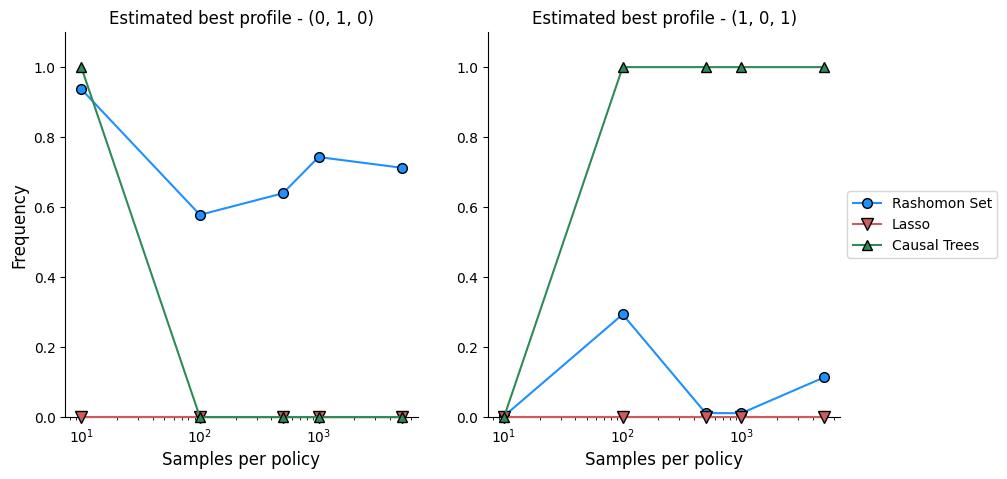

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

best_prof = "(0, 1, 0)"
second_best_prof = "(1, 0, 1)"

# Rashomon Means
ax[0].plot(rashomon_df["n_per_pol"], rashomon_df[best_prof + "_mean"],
           color="dodgerblue", alpha=1, zorder=1,
           marker="o", markeredgecolor="black", markersize=7,
           label="Rashomon Set")

ax[1].plot(rashomon_df["n_per_pol"], rashomon_df[second_best_prof + "_mean"],
           color="dodgerblue", alpha=1, zorder=1,
           marker="o", markeredgecolor="black", markersize=7,
           label="Rashomon Set")

# LASSO
ax[0].plot(lasso_df["n_per_pol"], lasso_df[best_prof + "_mean"],
           color="indianred", zorder=3, clip_on=False,
           marker="v", markeredgecolor="black", markersize=9,
           label="Lasso")

ax[1].plot(lasso_df["n_per_pol"], lasso_df[second_best_prof + "_mean"],
           color="indianred", zorder=3, clip_on=False,
           marker="v", markeredgecolor="black", markersize=9,
           label="Lasso")


# Causal trees
ax[0].plot(ct_df["n_per_pol"], ct_df[best_prof + "_mean"],
           color="seagreen", alpha=1, zorder=3, clip_on=False,
           marker="^", markeredgecolor="black", markersize=7,
           label="Causal Trees")

ax[1].plot(ct_df["n_per_pol"], ct_df[second_best_prof + "_mean"],
           color="seagreen", alpha=1, zorder=3, clip_on=False,
           marker="^", markeredgecolor="black", markersize=7,
           label="Causal Trees")

for i in range(2):
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].set_xscale("log")
    ax[i].set_xlabel("Samples per policy", fontsize=12)
    ax[i].set_ylim(0, 1.1)

ax[0].set_ylabel("Frequency", fontsize=12)
ax[0].set_title("Estimated best profile - " + best_prof, fontsize=12)
ax[1].set_title("Estimated best profile - " + second_best_prof, fontsize=12)
ax[1].legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/sim_" + n_str + "/best_profile_freq.png", dpi=300, bbox_inches="tight")
plt.show()

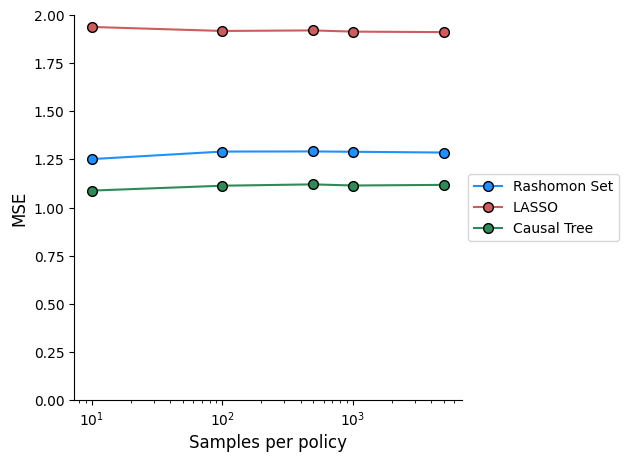

In [43]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["MSE_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["MSE_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax.plot(ct_df["n_per_pol"], ct_df["MSE_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy", fontsize=12)
ax.set_ylim(0, 2)
ax.set_ylabel("MSE", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/sim_" + n_str + "/MSE_ct.png", dpi=300, bbox_inches="tight")
plt.show()

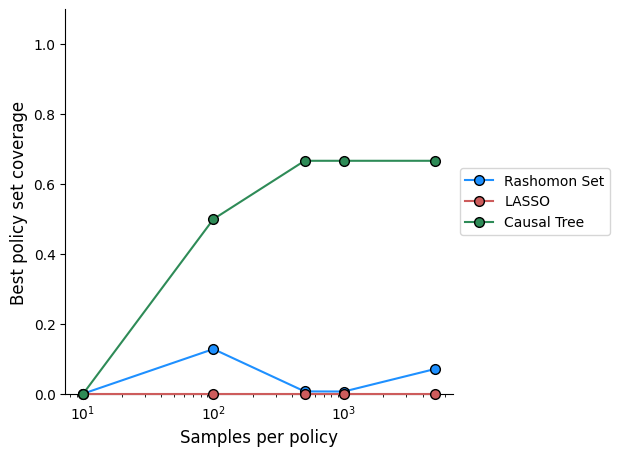

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["IOU_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["IOU_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax.plot(ct_df["n_per_pol"], ct_df["IOU_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy", fontsize=12)
ax.set_ylim(0, 1.1)
ax.set_ylabel("Best policy set coverage", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/sim_" + n_str + "/feature_coverage_ct.png", dpi=300, bbox_inches="tight")
plt.show()

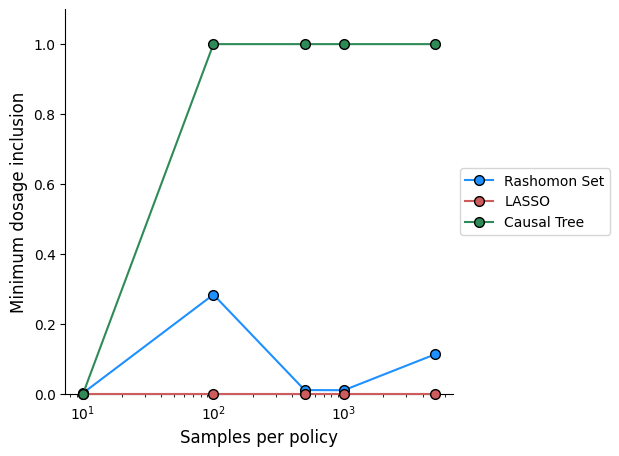

In [45]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["min_dosage_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["min_dosage_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax.plot(ct_df["n_per_pol"], ct_df["min_dosage_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy", fontsize=12)
ax.set_ylim(0, 1.1)
ax.set_ylabel("Minimum dosage inclusion", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/sim_" + n_str + "/min_dosage_inclusion_ct.png", dpi=300, bbox_inches="tight")
plt.show()

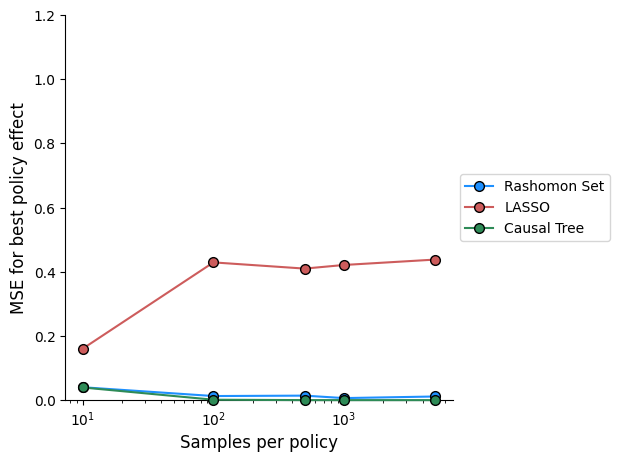

In [46]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["best_pol_MSE_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["best_pol_MSE_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax.plot(ct_df["n_per_pol"], ct_df["best_pol_MSE_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy", fontsize=12)
ax.set_ylim(0, 1.2)
ax.set_ylabel("MSE for best policy effect", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/sim_" + n_str + "/best_policy_MSE_ct.png", dpi=300, bbox_inches="tight")
plt.show()

# Simulation #4 plots

In [2]:
# n_str = str(4)
# extensions = ["_5_100", "_10", "_25_100", "_50", "_100", "_250", "_500", "_1000"]

# temp_df_list = []
# for ext in extensions:
#     temp_csv = "../Results/simulation_" + n_str + "_rashomon" + ext + ".csv"
#     temp_df = pd.read_csv(temp_csv)
#     temp_df = temp_df.drop("Unnamed: 0", axis=1)
#     temp_df_list.append(temp_df)

# rashomon_raw_df = pd.concat(temp_df_list, axis=0, ignore_index=True)
# rashomon_raw_df.head()

,n_per_pol,sim_num,num_pools,MSE,IOU,min_dosage,best_pol_diff,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
0,5,0,13,3.061273,0.0,False,-0.836875,0,0,0,1,0,0,0,0
1,5,0,14,3.057480,0.0,False,-0.836875,0,0,0,1,0,0,0,0
2,5,0,15,2.994770,0.0,False,-0.836875,0,0,0,1,0,0,0,0
3,5,0,15,2.995351,0.0,False,-1.299269,0,0,0,0,0,0,0,1
4,5,0,15,3.012999,0.0,False,-0.836875,0,0,0,1,0,0,0,0


In [3]:
# rashomon_df = rashomon_raw_df.copy()

# # compute the loss
# reg = 1e-1
# rashomon_df["loss"] = rashomon_df["MSE"] + reg * rashomon_df["num_pools"]

# # Find whether each model identifies the true best profile or not
# true_best_profile = "(1, 0, 1)"
# rashomon_df["right_best_profile"] = rashomon_df[true_best_profile]
# rashomon_df["wrong_best_profile"] = 1 - rashomon_df["right_best_profile"]

# # Remove all other columns
# to_drop = ["num_pools", "MSE", "IOU", "min_dosage", "best_pol_diff"]
# profile_cols = ["(0, 0, 0)", "(0, 0, 1)", "(0, 1, 0)", "(0, 1, 1)",
#                 "(1, 0, 0)", "(1, 0, 1)", "(1, 1, 0)", "(1, 1, 1)"]
# rashomon_df = rashomon_df.drop(to_drop, axis=1)
# rashomon_df = rashomon_df.drop(profile_cols, axis=1)

# # Sort loss grouped by n_per_pol and sim_num
# rashomon_df = rashomon_df.sort_values(["n_per_pol", "sim_num", "loss"], ascending=True)

# # Count models within each simulation iteration
# # Check if best profile is present in the first n models
# grouped_df = rashomon_df.groupby(["n_per_pol", "sim_num"]).cumsum()
# rashomon_df["best_profile_present"] = (grouped_df["right_best_profile"] > 0).astype(int)
# rashomon_df["model_number"] = grouped_df["right_best_profile"] + grouped_df["wrong_best_profile"]

# print(len(rashomon_df))

# rashomon_df.head(n=10)

23933207


,n_per_pol,sim_num,loss,right_best_profile,wrong_best_profile,best_profile_present,model_number
0,5,0,4.361273,0,1,0,1
7364,5,0,4.428992,0,1,0,2
153,5,0,4.456674,0,1,0,3
1,5,0,4.457480,0,1,0,4
27543,5,0,4.457700,0,1,0,5
773,5,0,4.460014,0,1,0,6
1535,5,0,4.460446,0,1,0,7
38134,5,0,4.460475,0,1,0,8
22,5,0,4.460884,0,1,0,9
19367,5,0,4.461176,0,1,0,10


In [4]:
# sizes = [5, 10, 25, 50, 100, 250, 500, 1000]
# simulations = list(range(100))
# df_groupby = rashomon_df.groupby(["n_per_pol", "sim_num"]).count()

# new_rows = []

# for n in sizes:
#     df_n = rashomon_df[rashomon_df["n_per_pol"] == n]
#     max_model_size = df_n["model_number"].max()
    
#     for t in simulations:
#         df_n_t = df_n[df_n["sim_num"] == t]
#         this_model_size = df_n_t["model_number"].max()
#         if len(df_n_t) == 0:
#             continue
#         last_row = df_n_t.iloc[-1]
#         dummy_row = [n, t, 0, 0, 0, last_row[-2], 0]
#         # dummy_row = [n, t, 0, 0, 0, 1, 0]
#         for i in range(this_model_size, max_model_size):
#             this_row = deepcopy(dummy_row)
#             this_row[-1] = i + 1
#             # if i + 1 == max_model_size:
#             #     this_row[-2] = 1
#             new_rows.append(this_row)

# new_df = pd.DataFrame(new_rows, columns=rashomon_df.columns)

# rashomon_df = pd.concat([rashomon_df, new_df], ignore_index=True)

/var/folders/ds/v36htzx10pv39ydvb7plxs1r0000gn/T/ipykernel_63600/2133077144.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dummy_row = [n, t, 0, 0, 0, last_row[-2], 0]


In [6]:
# rashomon_df["profile_rate"] = rashomon_df.groupby(["n_per_pol", "model_number"])["best_profile_present"].transform("mean")

# rashomon_df = rashomon_df.drop_duplicates(["n_per_pol", "model_number"])
# rashomon_df = rashomon_df.drop(["sim_num", "loss", "right_best_profile", "wrong_best_profile", "best_profile_present"], axis=1)

# # rashomon_df.to_csv("../Results/simulation_4_rashomon_processed.csv")

# print(len(rashomon_df))
# rashomon_df.head(n=10)

1007718


,n_per_pol,model_number,profile_rate
0,5,1,0.12
1,5,2,0.15
2,5,3,0.16
3,5,4,0.17
4,5,5,0.18
5,5,6,0.18
6,5,7,0.18
7,5,8,0.18
8,5,9,0.18
9,5,10,0.18


In [35]:
rashomon_df = pd.read_csv("../Results/simulation_4_rashomon_processed.csv")

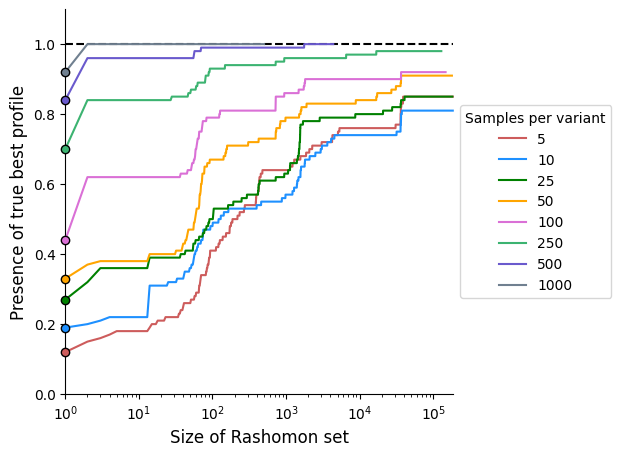

In [34]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

sizes = [5, 10, 25, 50, 100, 250, 500, 1000]
colors = ["indianred", "dodgerblue", "green", "orange", "orchid", "mediumseagreen", "slateblue", "slategray"]

# x_horizontal = np.linspace(1, np.max(rashomon_df["model_number"]), num=10)
x_horizontal = np.logspace(-1, 6, num=10, base=10)
len_x = len(x_horizontal)
y_best = np.array([1] * len_x)
y_baseline = np.array([1/8] * len_x)
ax.plot(x_horizontal, y_best, color="black", ls="--")
# ax.plot(x_horizontal, x_horizontal / 2**24, color="grey", ls="--")

for idx, n in enumerate(sizes):
    n_subset = rashomon_df[rashomon_df["n_per_pol"] == n]
    
    ax.plot(n_subset["model_number"], n_subset["profile_rate"],
            color=colors[idx], zorder=3.1, clip_on=False,
            label=f"{n}")
    ax.scatter(n_subset["model_number"].iloc[0], n_subset["profile_rate"].iloc[0],
               color=colors[idx], edgecolor="black",
               zorder=3.1, clip_on=False)

ax.set_xscale("log")
ax.set_xlabel("Size of Rashomon set", fontsize=12)
ax.set_ylim(0, 1.1)
ax.set_xlim(1, np.max(rashomon_df["model_number"]))
ax.set_ylabel("Presence of true best profile", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Samples per variant")

# plt.savefig("../Figures/sim_4/true_best_prof.png", dpi=300, bbox_inches="tight")
plt.show()

### Heat map

In [56]:
heatmap_df = rashomon_raw_df.copy()

reg = 1e-1
heatmap_df["loss"] = heatmap_df["MSE"] + reg * heatmap_df["num_pools"]
heatmap_df["posterior"] = np.exp(-heatmap_df["loss"])
heatmap_df["posterior"] = (heatmap_df["posterior"] - np.max(heatmap_df["posterior"])) / np.max(heatmap_df["posterior"])
# heatmap_df["posterior"] = (heatmap_df["posterior"] - np.min(heatmap_df["posterior"])) / \
#     (np.max(heatmap_df["posterior"]) - np.min(heatmap_df["posterior"]))


heatmap_dfs = [None]*4
heatmap_dfs[0] = heatmap_df[heatmap_df["n_per_pol"] == 10]
heatmap_dfs[1] = heatmap_df[heatmap_df["n_per_pol"] == 100]
heatmap_dfs[2] = heatmap_df[heatmap_df["n_per_pol"] == 1000]
heatmap_dfs[3] = heatmap_df[heatmap_df["n_per_pol"] == 5000]
# for i in range(4):
#     heatmap_dfs[i]["posterior"] = (heatmap_dfs[i]["posterior"] - np.min(heatmap_dfs[i]["posterior"])) / \
#         (np.max(heatmap_dfs[i]["posterior"]) - np.min(heatmap_dfs[i]["posterior"]))
    

In [57]:
heatmap_df.head()

,n_per_pol,sim_num,num_pools,MSE,IOU,min_dosage,best_pol_diff,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)",loss,posterior
0,10,0,9,1.211022,1.0,True,-0.490068,0,0,1,0,0,0,0,0,2.111022,-0.016364
1,10,0,10,1.202085,1.0,True,-0.490068,0,0,1,0,0,0,0,0,2.202085,-0.101979
2,10,0,10,1.207921,1.0,True,-0.490068,0,0,1,0,0,0,0,0,2.207921,-0.107205
3,10,0,10,1.208307,1.0,True,-0.490068,0,0,1,0,0,0,0,0,2.208307,-0.107549
4,10,0,10,1.209578,1.0,True,-0.490068,0,0,1,0,0,0,0,0,2.209578,-0.108683


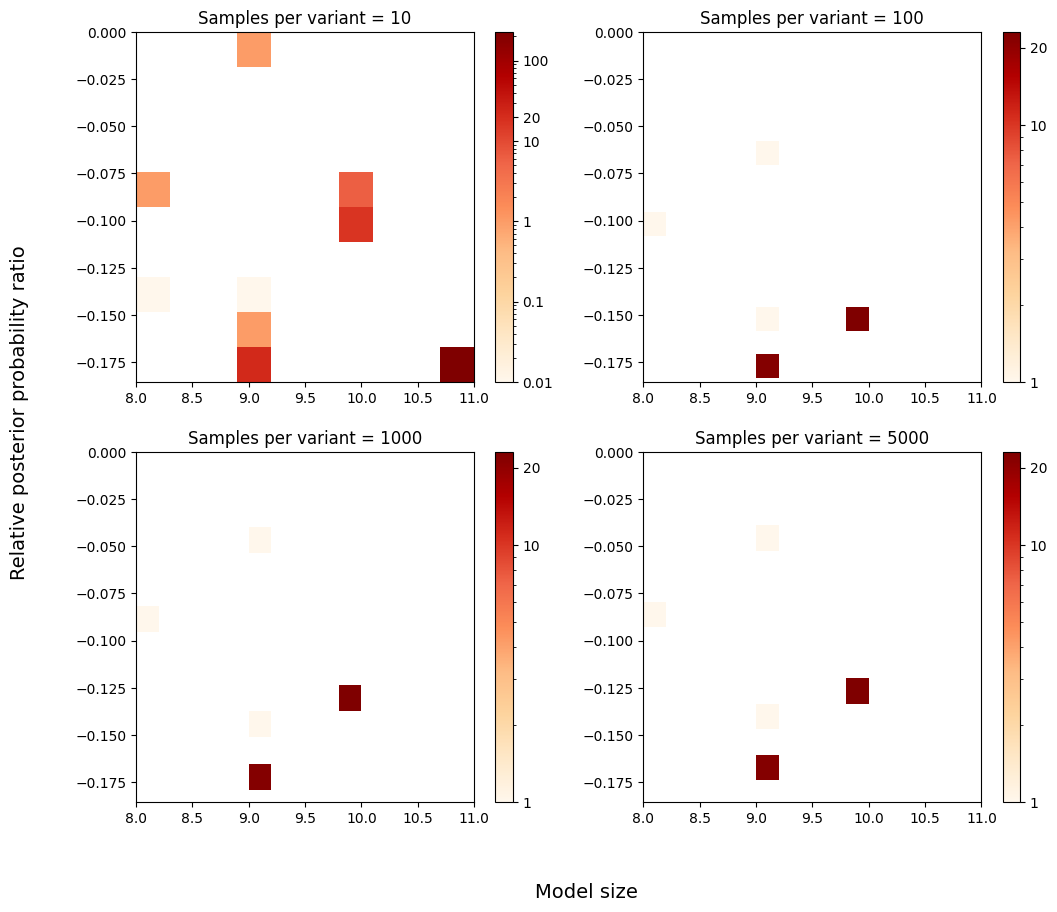

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

h = ax[0, 0].hist2d(heatmap_dfs[0]["num_pools"], heatmap_dfs[0]["posterior"], norm=colors.LogNorm(),
             cmap="OrRd", weights=[1e-2]*len(heatmap_dfs[0]))
ax[0, 0].set_title("Samples per variant = 10", fontsize=12)
cb_00 = fig.colorbar(h[3], norm=colors.NoNorm, ax=ax[0, 0])
# ticks_00 = [0.01, 0.1, 0.5, 1]
# ticks_00 = [0.01, 0.1, 1, 10, 20, 100]
ticks_00 = [0.01, 0.1, 1, 10, 20, 100]
cb_00.set_ticks(ticks_00)
cb_00.set_ticklabels(ticks_00)


h = ax[0, 1].hist2d(heatmap_dfs[1]["num_pools"], heatmap_dfs[1]["posterior"], norm=colors.LogNorm(),
             cmap="OrRd", weights=[1e-2]*len(heatmap_dfs[1]))
ax[0, 1].set_title("Samples per variant = 100", fontsize=12)
cb_01 = fig.colorbar(h[3], norm=colors.NoNorm, ax=ax[0, 1])
# ticks_01 = [0.01, 0.1, 0.5, 1]
# ticks_01 = [0.01, 0.1, 1, 10, 40]
ticks_01 = [1, 10, 20]
cb_01.set_ticks(ticks_01)
cb_01.set_ticklabels(ticks_01)

h = ax[1, 0].hist2d(heatmap_dfs[2]["num_pools"], heatmap_dfs[2]["posterior"], norm=colors.LogNorm(),
             cmap="OrRd", weights=[1e-2]*len(heatmap_dfs[2]))
ax[1, 0].set_title("Samples per variant = 1000", fontsize=12)
cb_10 = fig.colorbar(h[3], norm=colors.NoNorm, ax=ax[1, 0])
# ticks_10 = [0.05, 0.1, 1]
# ticks_10 = [0.01, 0.1, 1, 10, 20]
ticks_10 = [1, 10, 20]
cb_10.set_ticks(ticks_10)
cb_10.set_ticklabels(ticks_10)

h = ax[1, 1].hist2d(heatmap_dfs[3]["num_pools"], heatmap_dfs[3]["posterior"], norm=colors.LogNorm(),
             cmap="OrRd", weights=[1e-2]*len(heatmap_dfs[3]))
ax[1, 1].set_title("Samples per variant = 5000", fontsize=12)
cb_11 = fig.colorbar(h[3], norm=colors.NoNorm, ax=ax[1, 1])
# ticks_11 = [0.1, 1, 2]
# ticks_11 = [0.01, 1, 10, 20]
ticks_11 = [1, 10, 20]
cb_11.set_ticks(ticks_11)
cb_11.set_ticklabels(ticks_11)

for i in range(2):
    for j in range(2):
        ax[i, j].set_ylim(np.min(heatmap_df["posterior"]), 0)
        # ax[i, j].set_xlim(2, 9)
        # ax[i, j].set_xlim(8, 13)
        ax[i, j].set_xlim(8, 11)
#         ax[i, j].set_ylabel("Scaled Posterior probability", fontsize=12)


fig.supylabel("Relative posterior probability ratio", fontsize=14)
fig.supxlabel("Model size", fontsize=14)

# plt.savefig("../Figures/sim_" + n_str + "/rset_2d_hist.png", dpi=300, bbox_inches="tight")
# plt.savefig("../Figures/worst_case/rset_2d_hist.png", dpi=300, bbox_inches="tight")
plt.show()

### Sample heatmap

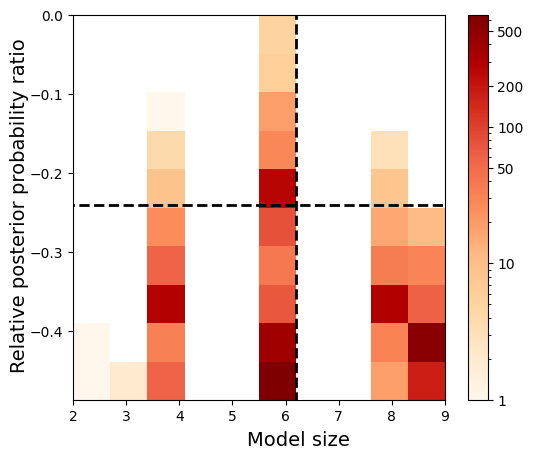

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))

h = ax.hist2d(heatmap_df["num_pools"], heatmap_df["posterior"], norm=colors.LogNorm(),
             cmap="OrRd")#, weights=[1e-2]*len(heatmap_df))
cb = fig.colorbar(h[3], norm=colors.NoNorm, ax=ax)
ticks = [1, 10, 50, 100, 200, 500]
cb.set_ticks(ticks)
cb.set_ticklabels(ticks)

ax.plot([1, 11], [-0.24, -0.24], color="black", linestyle="--", linewidth=2)
ax.plot([6.2, 6.2], [-0.6, 0.1], color="black", linestyle="--", linewidth=2)



fig.supylabel("Relative posterior probability ratio", fontsize=14)
fig.supxlabel("Model size", fontsize=14)

# plt.savefig("../Figures/ex_2d_hist.png", dpi=300, bbox_inches="tight")
plt.show()